In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [4]:
df_train.shape

(60000, 785)

In [5]:
df_test.shape

(10000, 785)

In [6]:
28 * 28

784

In [34]:
X_train = df_train.iloc[:, 1:].values.astype(np.float32)/255
X_test = df_test.iloc[:, 1:].values.astype(np.float32)/255

In [13]:
type(X_train), X_train.dtype

(numpy.ndarray, dtype('float32'))

In [15]:
y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

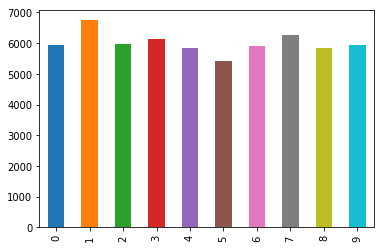

In [19]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [36]:
pd.Series(X_train.flatten()).describe()

count    4.704000e+07
mean     1.311360e-01
std      2.885157e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64

In [22]:
X_train.flatten().shape

(47040000,)

In [26]:
X_train[0].reshape(28, 28).shape

(28, 28)

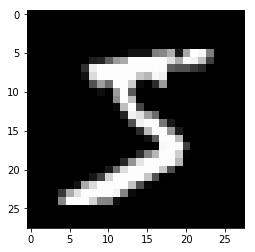

In [29]:
plt.imshow(X_train[0].reshape(28, 28), cmap = "gray")

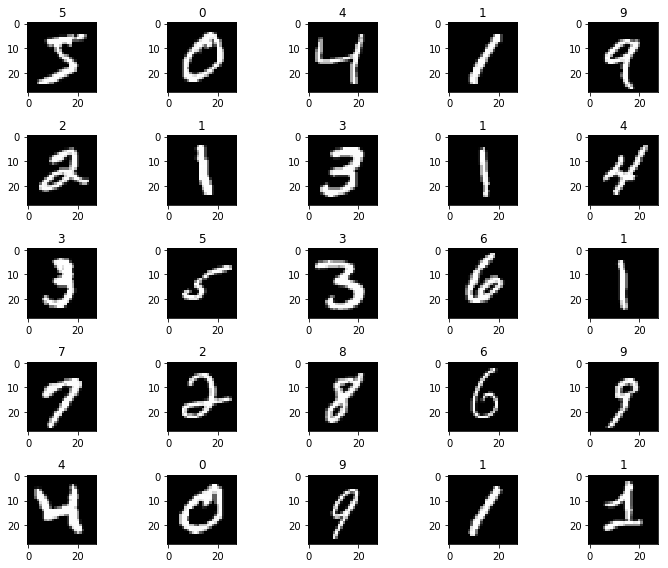

In [32]:
fig, _ = plt.subplots(5, 5, figsize = (10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap = "gray")
    ax.set_title(y_train[i])
plt.tight_layout()

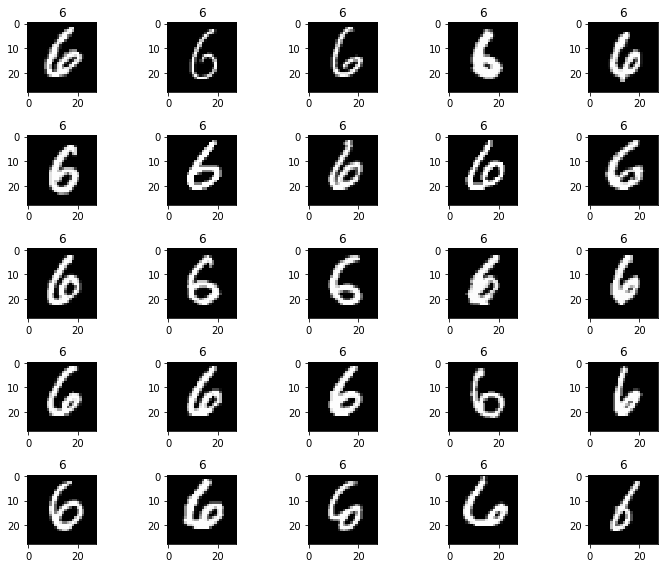

In [35]:
fig, _ = plt.subplots(5, 5, figsize = (10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[y_train == 6][i].reshape(28, 28), cmap = "gray")
    ax.set_title(y_train[y_train == 6][i])
plt.tight_layout()

In [38]:
from sklearn import linear_model

In [46]:
%%time
est = linear_model.SGDClassifier(n_jobs=12, tol=1e-5, eta0 = 0.15,loss = "log",  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
print("accuracy", est.score(X_test, y_test), "iterations:", est.n_iter_)

accuracy 0.8995 iterations: 56
CPU times: user 37.4 s, sys: 209 ms, total: 37.6 s
Wall time: 7.91 s


In [41]:
est.coef_.shape

(10, 784)

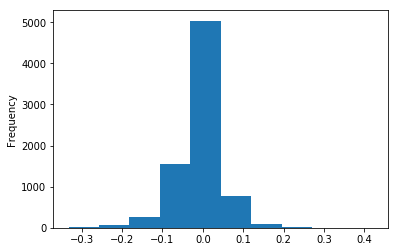

In [42]:
pd.Series(est.coef_.flatten()).plot.hist()

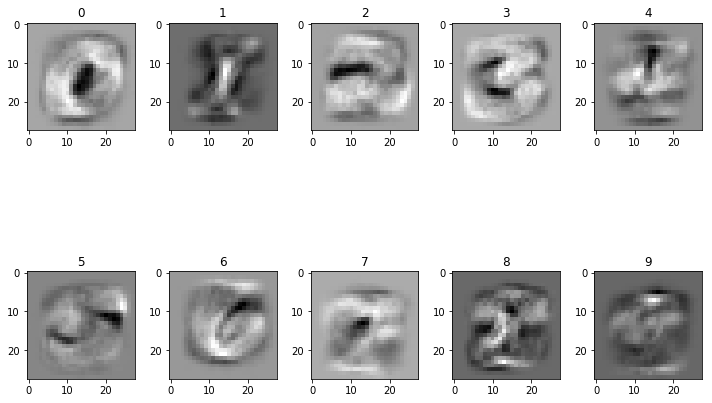

In [43]:
fig, _ = plt.subplots(2, 5, figsize = (10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(est.coef_[i].reshape(28, 28), cmap = "gray")
    ax.set_title(i)
plt.tight_layout()

In [48]:
y_test_prob = est.predict_proba(X_test)

In [49]:
y_test_prob.shape

(10000, 10)

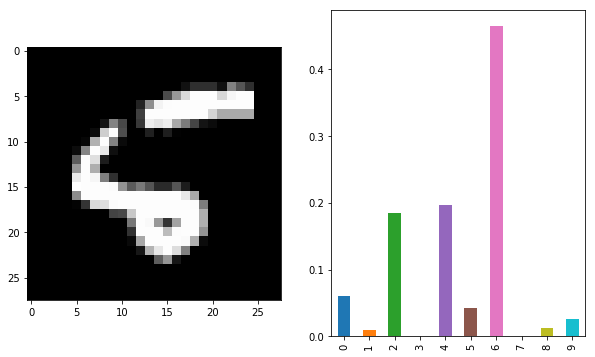

In [64]:
index = 8
plt.figure(figsize = (10,6))
plt.subplot(121)
plt.imshow(X_test[index].reshape(28, 28), cmap = "gray")
plt.subplot(122)
pd.Series(y_test_prob[index]).plot.bar()

In [59]:
y_test_pred = est.predict(X_test)
matched = y_test == y_test_pred

In [62]:
df_test.index[~matched]

Int64Index([   8,   33,   38,   46,   63,   77,   92,  111,  124,  149,
            ...
            9941, 9943, 9944, 9959, 9970, 9975, 9980, 9982, 9986, 9998],
           dtype='int64', length=1005)

In [63]:
y_test[8], y_test_pred[8]

(5, 6)

In [67]:
import keras

Using TensorFlow backend.


In [82]:
model = keras.Sequential()
model.add(keras.layers.InputLayer((784,), dtype="float"))
model.add(keras.layers.Dense(10, activation="softmax")) 
# softmax is used for output layer for multi class models
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy
              , metrics=["acc"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [73]:
y_test.shape

(10000,)

In [79]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
Y_test.shape

(10000, 10)

In [80]:
pd.DataFrame(Y_test).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [85]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test),  batch_size=128, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2571 - acc: 0.9289 - val_loss: 0.2632 - val_acc: 0.9268
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2555 - acc: 0.9290 - val_loss: 0.2621 - val_acc: 0.9264
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.2535 - acc: 0.9304 - val_loss: 0.2626 - val_acc: 0.9267
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2518 - acc: 0.9299 - val_loss: 0.2648 - val_acc: 0.9254
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.2505 - acc: 0.9309 - val_loss: 0.2632 - val_acc: 0.9271
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.2491 - acc: 0.9314 - val_loss: 0.2639 - val_acc: 0.9276
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.2481 - acc: 0.9317 - val_loss: 0.2636 - val_acc

In [86]:
model = keras.Sequential()
model.add(keras.layers.InputLayer((784,), dtype="float"))
model.add(keras.layers.Dense(400, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax")) 
# softmax is used for output layer for multi class models
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy
              , metrics=["acc"])
model.summary()

model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test)
          ,batch_size=128, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2820 - acc: 0.9216 - val_loss: 0.1467 - val_acc: 0.9570
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1163 - acc: 0.9663 - val_loss: 0.0993 - val_acc: 0.9696
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0771 - acc: 0.9780 - val_loss: 0.0781 - val_acc: 0.9738
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step 

In [87]:
model = keras.Sequential()
model.add(keras.layers.InputLayer((784,), dtype="float"))
model.add(keras.layers.Dense(400, activation="relu")) 
model.add(keras.layers.Dense(10, activation="sigmoid")) 
# softmax is used for output layer for multi class models
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy
              , metrics=["acc"])
model.summary()

model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test)
          ,batch_size=128, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.3069 - acc: 0.9171 - val_loss: 0.1611 - val_acc: 0.9545
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1219 - acc: 0.9645 - val_loss: 0.1106 - val_acc: 0.9653
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0809 - acc: 0.9767 - val_loss: 0.0832 - val_acc: 0.9753
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step 

In [89]:
model = keras.Sequential()
model.add(keras.layers.InputLayer((784,), dtype="float"))
model.add(keras.layers.Dense(400, activation="sigmoid")) 
model.add(keras.layers.Dense(100, activation="relu")) 
model.add(keras.layers.Dense(50, activation="sigmoid")) 
model.add(keras.layers.Dense(10, activation="sigmoid")) 
# softmax is used for output layer for multi class models
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy
              , metrics=["acc"])
model.summary()

model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test)
          ,batch_size=128, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                510       
Total params: 359,660
Trainable params: 359,660
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.7763 - acc: 0.8251 - val_loss: 0.2916 - val_acc: 0.9251
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.

In [90]:
model = keras.Sequential()
model.add(keras.layers.InputLayer((784,), dtype="float"))
model.add(keras.layers.Dense(400, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax")) 
# softmax is used for output layer for multi class models
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy
              , metrics=["acc"])
model.summary()

model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test)
          ,batch_size=128, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2822 - acc: 0.9208 - val_loss: 0.1431 - val_acc: 0.9575
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1174 - acc: 0.9657 - val_loss: 0.1018 - val_acc: 0.9684
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0785 - acc: 0.9769 - val_loss: 0.0787 - val_acc: 0.9759
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step 

In [93]:
y_test_prob = model.predict_proba(X_test)
y_test_prob.shape

(10000, 10)

In [95]:
y_test_pred = np.argmax(y_test_prob, axis = 1)
y_test_pred.shape

(10000,)

In [96]:
matched = y_test == y_test_pred

In [97]:
df_test.index[~matched]

Int64Index([ 115,  149,  217,  247,  321,  340,  381,  445,  495,  582,
            ...
            9745, 9768, 9770, 9779, 9782, 9792, 9793, 9811, 9839, 9944],
           dtype='int64', length=190)

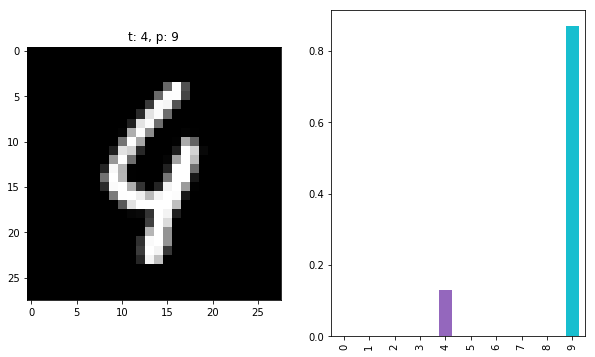

In [99]:
index = 115
plt.figure(figsize = (10,6))
plt.subplot(121)
plt.imshow(X_test[index].reshape(28, 28), cmap = "gray")
plt.title("t: %d, p: %d" % (y_test[index], y_test_pred[index]))
plt.subplot(122)
pd.Series(y_test_prob[index]).plot.bar()

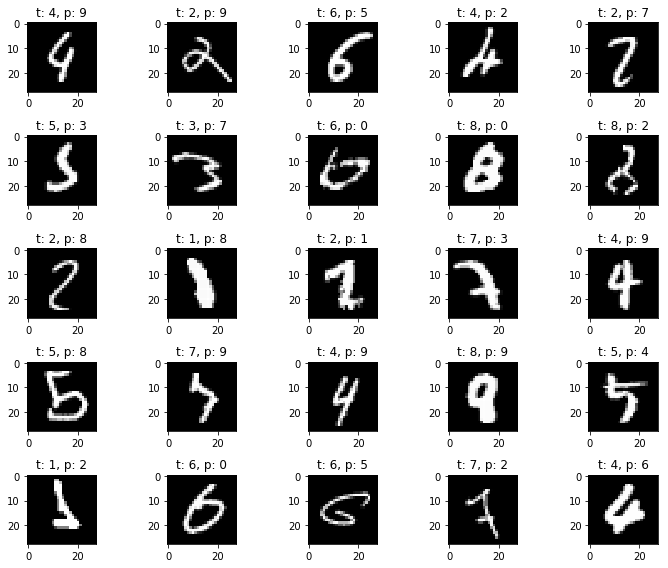

In [104]:
fig, _ = plt.subplots(5, 5, figsize = (10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[~matched][i].reshape(28, 28), cmap = "gray")
    title = "t: %d, p: %d" % (y_test[~matched][i], y_test_pred[~matched][i])
    ax.set_title(title)
plt.tight_layout()

In [105]:
summary = pd.DataFrame({"actual": y_test, "prediction": y_test_pred, "matched": matched})

In [111]:
import seaborn as sns

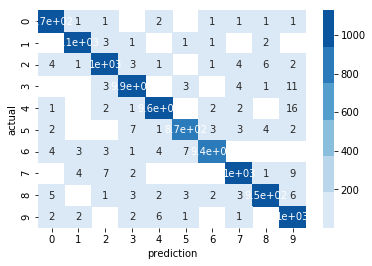

In [117]:
sns.heatmap(summary.pivot_table("matched", "actual", "prediction", aggfunc="count" )
            , cmap = sns.color_palette("Blues"), annot = True)

In [119]:
np.sum(~ summary.matched)

190

In [123]:
X_train_img = X_train.reshape((-1, 28, 28, 1))
X_test_img = X_test.reshape((-1, 28, 28, 1))
X_train_img.shape, X_test_img.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [125]:
model = keras.Sequential()

model.add(keras.layers.InputLayer((28,28, 1), dtype="float"))
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(400, activation="relu")) 
model.add(keras.layers.Dense(100, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax")) 
# softmax is used for output layer for multi class models
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy
              , metrics=["acc"])
model.summary()

model.fit(X_train_img, Y_train, 
          validation_data=(X_test_img, Y_test)
          ,batch_size=128, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 400)               410000    
__________

In [131]:
y_test_pred = np.argmax(model.predict(X_test_img), axis = 1)
matched = np.equal(y_test, y_test_pred)
np.sum(~ summary.matched)

190

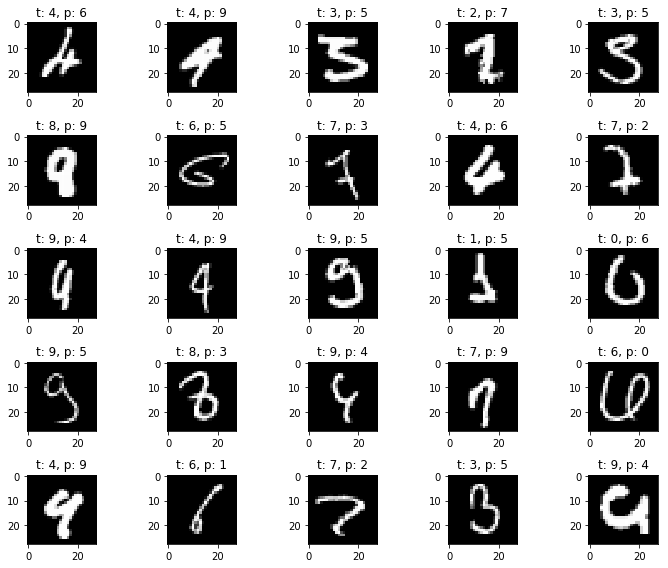

In [132]:
fig, _ = plt.subplots(5, 5, figsize = (10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[~matched][i].reshape(28, 28), cmap = "gray")
    title = "t: %d, p: %d" % (y_test[~matched][i], y_test_pred[~matched][i])
    ax.set_title(title)
plt.tight_layout()

In [154]:
import tensorflow as tf
import numpy as np
from math import ceil
# X -> m, n
# y > m, 10

In [155]:
X = tf.placeholder("float32", (None, 784))
y = tf.placeholder("int32", (None,))
print("X:", X)
print("y:", y)

y_oh = tf.one_hot(y, depth = 10)

W = tf.Variable(tf.truncated_normal([784, 10], dtype="float32", seed=1)) 
print("W", W)

b = tf.zeros([10])

Z = tf.matmul(X, W) + b
print("Z", Z)

y_pred = tf.argmax(Z, axis = 1, output_type="int32")
print("y_pred", y_pred)

accuracy = tf.reduce_mean(tf.cast(tf.equal(y, y_pred), "float32"))
print("accuracy", accuracy)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_oh, logits=Z))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

batch_size = 128

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    
    
    for i in range(10):
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        
        num_batches = ceil(len(X_train)/ batch_size)
        for j in range(num_batches):
            start = j*batch_size
            batch_indices = indices[start:start+batch_size]
            X_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]
            values = {X: X_batch, y: y_batch}
            accuracy_, cost_, _ = sess.run([accuracy, cost, optimizer], feed_dict=values) 
            print("accuracy: %f, cost: %f" % (accuracy_, cost_))
    test_accuracy = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
    print("Test accuracy: ", test_accuracy)


X: Tensor("Placeholder_33:0", shape=(?, 784), dtype=float32)
y: Tensor("Placeholder_34:0", shape=(?,), dtype=int32)
W <tf.Variable 'Variable_12:0' shape=(784, 10) dtype=float32_ref>
Z Tensor("add_10:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax_9:0", shape=(?,), dtype=int32)
accuracy Tensor("Mean_13:0", shape=(), dtype=float32)
accuracy: 0.148438, cost: 9.557859
accuracy: 0.101562, cost: 9.802637
accuracy: 0.109375, cost: 8.815050
accuracy: 0.171875, cost: 8.266416
accuracy: 0.179688, cost: 7.430178
accuracy: 0.117188, cost: 6.932732
accuracy: 0.164062, cost: 5.755753
accuracy: 0.187500, cost: 5.811481
accuracy: 0.265625, cost: 5.231361
accuracy: 0.179688, cost: 4.992393
accuracy: 0.195312, cost: 5.474370
accuracy: 0.320312, cost: 4.688197
accuracy: 0.250000, cost: 5.102569
accuracy: 0.281250, cost: 5.576772
accuracy: 0.265625, cost: 5.556629
accuracy: 0.320312, cost: 5.072765
accuracy: 0.320312, cost: 4.605175
accuracy: 0.375000, cost: 4.382942
accuracy: 0.437500, cost: 3.36

accuracy: 0.820312, cost: 0.843318
accuracy: 0.796875, cost: 0.682715
accuracy: 0.835938, cost: 0.826951
accuracy: 0.812500, cost: 0.754058
accuracy: 0.835938, cost: 0.649192
accuracy: 0.843750, cost: 0.761621
accuracy: 0.859375, cost: 0.490849
accuracy: 0.828125, cost: 0.821822
accuracy: 0.851562, cost: 0.592505
accuracy: 0.882812, cost: 0.755802
accuracy: 0.867188, cost: 0.613528
accuracy: 0.890625, cost: 0.392645
accuracy: 0.898438, cost: 0.489874
accuracy: 0.882812, cost: 0.522962
accuracy: 0.796875, cost: 0.756553
accuracy: 0.882812, cost: 0.538298
accuracy: 0.851562, cost: 0.600688
accuracy: 0.898438, cost: 0.448906
accuracy: 0.828125, cost: 0.877484
accuracy: 0.882812, cost: 0.574306
accuracy: 0.843750, cost: 0.614845
accuracy: 0.789062, cost: 0.871871
accuracy: 0.828125, cost: 0.797098
accuracy: 0.875000, cost: 0.463280
accuracy: 0.812500, cost: 0.850782
accuracy: 0.828125, cost: 0.725836
accuracy: 0.851562, cost: 0.826250
accuracy: 0.859375, cost: 0.477352
accuracy: 0.875000, 

accuracy: 0.921875, cost: 0.229961
accuracy: 0.867188, cost: 0.619250
accuracy: 0.875000, cost: 0.421670
accuracy: 0.914062, cost: 0.321236
accuracy: 0.796875, cost: 0.712790
accuracy: 0.890625, cost: 0.544350
accuracy: 0.921875, cost: 0.330708
accuracy: 0.882812, cost: 0.599667
accuracy: 0.921875, cost: 0.265874
accuracy: 0.828125, cost: 0.791680
accuracy: 0.867188, cost: 0.489955
accuracy: 0.906250, cost: 0.586754
accuracy: 0.929688, cost: 0.352764
accuracy: 0.843750, cost: 0.456654
accuracy: 0.914062, cost: 0.352204
accuracy: 0.859375, cost: 0.566018
accuracy: 0.851562, cost: 0.715666
accuracy: 0.890625, cost: 0.630500
accuracy: 0.882812, cost: 0.486279
accuracy: 0.828125, cost: 0.646090
accuracy: 0.882812, cost: 0.360441
accuracy: 0.835938, cost: 0.957144
accuracy: 0.859375, cost: 0.576524
accuracy: 0.914062, cost: 0.306058
accuracy: 0.882812, cost: 0.393058
accuracy: 0.937500, cost: 0.190939
accuracy: 0.914062, cost: 0.414450
accuracy: 0.890625, cost: 0.359883
accuracy: 0.898438, 

accuracy: 0.898438, cost: 0.389431
accuracy: 0.914062, cost: 0.476097
accuracy: 0.890625, cost: 0.429777
accuracy: 0.921875, cost: 0.292619
accuracy: 0.835938, cost: 0.802105
accuracy: 0.921875, cost: 0.496963
accuracy: 0.890625, cost: 0.462413
accuracy: 0.875000, cost: 0.306477
accuracy: 0.914062, cost: 0.278533
accuracy: 0.867188, cost: 0.414255
accuracy: 0.906250, cost: 0.295536
accuracy: 0.890625, cost: 0.385334
accuracy: 0.921875, cost: 0.221714
accuracy: 0.914062, cost: 0.337908
accuracy: 0.906250, cost: 0.307320
accuracy: 0.882812, cost: 0.376266
accuracy: 0.914062, cost: 0.399234
accuracy: 0.890625, cost: 0.316227
accuracy: 0.890625, cost: 0.434927
accuracy: 0.890625, cost: 0.297639
accuracy: 0.859375, cost: 0.489641
accuracy: 0.882812, cost: 0.627419
accuracy: 0.851562, cost: 0.570276
accuracy: 0.921875, cost: 0.251978
accuracy: 0.851562, cost: 0.464979
accuracy: 0.937500, cost: 0.210989
accuracy: 0.921875, cost: 0.324277
accuracy: 0.914062, cost: 0.343356
accuracy: 0.890625, 

accuracy: 0.882812, cost: 0.357995
accuracy: 0.914062, cost: 0.320526
accuracy: 0.898438, cost: 0.319728
accuracy: 0.851562, cost: 0.483226
accuracy: 0.851562, cost: 0.605609
accuracy: 0.867188, cost: 0.669604
accuracy: 0.906250, cost: 0.366587
accuracy: 0.898438, cost: 0.347188
accuracy: 0.906250, cost: 0.542594
accuracy: 0.898438, cost: 0.508671
accuracy: 0.851562, cost: 0.379447
accuracy: 0.914062, cost: 0.449857
accuracy: 0.867188, cost: 0.506845
accuracy: 0.843750, cost: 0.382527
accuracy: 0.867188, cost: 0.614721
accuracy: 0.875000, cost: 0.455341
accuracy: 0.906250, cost: 0.259719
accuracy: 0.890625, cost: 0.418917
accuracy: 0.906250, cost: 0.232141
accuracy: 0.953125, cost: 0.167188
accuracy: 0.867188, cost: 0.490595
accuracy: 0.914062, cost: 0.272462
accuracy: 0.929688, cost: 0.184648
accuracy: 0.945312, cost: 0.401998
accuracy: 0.921875, cost: 0.354895
accuracy: 0.882812, cost: 0.422457
accuracy: 0.921875, cost: 0.404330
accuracy: 0.859375, cost: 0.437337
accuracy: 0.914062, 

accuracy: 0.906250, cost: 0.274509
accuracy: 0.937500, cost: 0.302937
accuracy: 0.906250, cost: 0.206184
accuracy: 0.843750, cost: 0.478254
accuracy: 0.914062, cost: 0.256676
accuracy: 0.929688, cost: 0.311888
accuracy: 0.859375, cost: 0.469177
accuracy: 0.921875, cost: 0.238163
accuracy: 0.945312, cost: 0.179724
accuracy: 0.890625, cost: 0.456388
accuracy: 0.859375, cost: 0.550063
accuracy: 0.875000, cost: 0.619491
accuracy: 0.929688, cost: 0.214242
accuracy: 0.929688, cost: 0.248944
accuracy: 0.882812, cost: 0.535638
accuracy: 0.914062, cost: 0.305148
accuracy: 0.859375, cost: 0.330429
accuracy: 0.914062, cost: 0.235264
accuracy: 0.921875, cost: 0.242080
accuracy: 0.937500, cost: 0.216701
accuracy: 0.937500, cost: 0.299831
accuracy: 0.921875, cost: 0.328883
accuracy: 0.914062, cost: 0.340334
accuracy: 0.929688, cost: 0.260516
accuracy: 0.890625, cost: 0.376520
accuracy: 0.890625, cost: 0.492943
accuracy: 0.906250, cost: 0.305324
accuracy: 0.906250, cost: 0.416904
accuracy: 0.921875, 

accuracy: 0.945312, cost: 0.276021
accuracy: 0.898438, cost: 0.214624
accuracy: 0.945312, cost: 0.183783
accuracy: 0.914062, cost: 0.456061
accuracy: 0.929688, cost: 0.359803
accuracy: 0.921875, cost: 0.353765
accuracy: 0.921875, cost: 0.428435
accuracy: 0.906250, cost: 0.352240
accuracy: 0.875000, cost: 0.399294
accuracy: 0.914062, cost: 0.295251
accuracy: 0.929688, cost: 0.255647
accuracy: 0.937500, cost: 0.208894
accuracy: 0.906250, cost: 0.411179
accuracy: 0.898438, cost: 0.468153
accuracy: 0.914062, cost: 0.325927
accuracy: 0.929688, cost: 0.334983
accuracy: 0.890625, cost: 0.454645
accuracy: 0.921875, cost: 0.556970
accuracy: 0.890625, cost: 0.420504
accuracy: 0.898438, cost: 0.280992
accuracy: 0.898438, cost: 0.281627
accuracy: 0.921875, cost: 0.323085
accuracy: 0.898438, cost: 0.264771
accuracy: 0.898438, cost: 0.402577
accuracy: 0.882812, cost: 0.414338
accuracy: 0.914062, cost: 0.567451
accuracy: 0.921875, cost: 0.275476
accuracy: 0.914062, cost: 0.334816
accuracy: 0.898438, 

accuracy: 0.906250, cost: 0.330637
accuracy: 0.929688, cost: 0.349976
accuracy: 0.921875, cost: 0.224140
accuracy: 0.906250, cost: 0.324055
accuracy: 0.929688, cost: 0.254109
accuracy: 0.906250, cost: 0.369209
accuracy: 0.859375, cost: 0.456964
accuracy: 0.875000, cost: 0.359152
accuracy: 0.898438, cost: 0.370829
accuracy: 0.882812, cost: 0.420083
accuracy: 0.929688, cost: 0.401004
accuracy: 0.906250, cost: 0.302716
accuracy: 0.929688, cost: 0.203270
accuracy: 0.937500, cost: 0.129784
accuracy: 0.921875, cost: 0.228278
accuracy: 0.906250, cost: 0.471883
accuracy: 0.914062, cost: 0.339875
accuracy: 0.906250, cost: 0.378400
accuracy: 0.906250, cost: 0.322804
accuracy: 0.890625, cost: 0.321997
accuracy: 0.914062, cost: 0.381405
accuracy: 0.968750, cost: 0.122864
accuracy: 0.890625, cost: 0.358525
accuracy: 0.898438, cost: 0.412662
accuracy: 0.906250, cost: 0.240942
accuracy: 0.937500, cost: 0.218217
accuracy: 0.890625, cost: 0.458622
accuracy: 0.882812, cost: 0.493415
accuracy: 0.898438, 

accuracy: 0.898438, cost: 0.452866
accuracy: 0.882812, cost: 0.360527
accuracy: 0.953125, cost: 0.142038
accuracy: 0.914062, cost: 0.484221
accuracy: 0.898438, cost: 0.351919
accuracy: 0.937500, cost: 0.221785
accuracy: 0.882812, cost: 0.375235
accuracy: 0.929688, cost: 0.196880
accuracy: 0.906250, cost: 0.431475
accuracy: 0.953125, cost: 0.156596
accuracy: 0.937500, cost: 0.277159
accuracy: 0.968750, cost: 0.113344
accuracy: 0.914062, cost: 0.460105
accuracy: 0.851562, cost: 0.424266
accuracy: 0.945312, cost: 0.222805
accuracy: 0.929688, cost: 0.282997
accuracy: 0.921875, cost: 0.452345
accuracy: 0.914062, cost: 0.461489
accuracy: 0.945312, cost: 0.297840
accuracy: 0.921875, cost: 0.369313
accuracy: 0.921875, cost: 0.278416
accuracy: 0.898438, cost: 0.306901
accuracy: 0.960938, cost: 0.118131
accuracy: 0.898438, cost: 0.483014
accuracy: 0.914062, cost: 0.303332
accuracy: 0.914062, cost: 0.253932
accuracy: 0.906250, cost: 0.284342
accuracy: 0.921875, cost: 0.222005
accuracy: 0.882812, 

accuracy: 0.953125, cost: 0.195481
accuracy: 0.875000, cost: 0.438536
accuracy: 0.906250, cost: 0.341313
accuracy: 0.914062, cost: 0.486574
accuracy: 0.921875, cost: 0.512634
accuracy: 0.890625, cost: 0.409361
accuracy: 0.914062, cost: 0.246639
accuracy: 0.929688, cost: 0.252098
accuracy: 0.937500, cost: 0.176822
accuracy: 0.890625, cost: 0.552455
accuracy: 0.929688, cost: 0.349274
accuracy: 0.890625, cost: 0.367387
accuracy: 0.937500, cost: 0.506839
accuracy: 0.890625, cost: 0.257997
accuracy: 0.890625, cost: 0.385687
accuracy: 0.898438, cost: 0.316028
accuracy: 0.968750, cost: 0.109043
accuracy: 0.882812, cost: 0.418947
accuracy: 0.921875, cost: 0.290325
accuracy: 0.898438, cost: 0.335546
accuracy: 0.906250, cost: 0.307622
accuracy: 0.898438, cost: 0.295071
accuracy: 0.898438, cost: 0.311732
accuracy: 0.859375, cost: 0.473185
accuracy: 0.882812, cost: 0.449071
accuracy: 0.859375, cost: 0.549720
accuracy: 0.851562, cost: 0.458230
accuracy: 0.921875, cost: 0.376376
accuracy: 0.953125, 

accuracy: 0.898438, cost: 0.327244
accuracy: 0.906250, cost: 0.317268
accuracy: 0.898438, cost: 0.466397
accuracy: 0.937500, cost: 0.222924
accuracy: 0.875000, cost: 0.478368
accuracy: 0.929688, cost: 0.171928
accuracy: 0.921875, cost: 0.292154
accuracy: 0.953125, cost: 0.109090
accuracy: 0.937500, cost: 0.192896
accuracy: 0.914062, cost: 0.306606
accuracy: 0.929688, cost: 0.417488
accuracy: 0.882812, cost: 0.338626
accuracy: 0.914062, cost: 0.256559
accuracy: 0.921875, cost: 0.302719
accuracy: 0.945312, cost: 0.219764
accuracy: 0.929688, cost: 0.250632
accuracy: 0.921875, cost: 0.309273
accuracy: 0.929688, cost: 0.230518
accuracy: 0.921875, cost: 0.271986
accuracy: 0.945312, cost: 0.284692
accuracy: 0.890625, cost: 0.326309
accuracy: 0.914062, cost: 0.310300
accuracy: 0.882812, cost: 0.401955
accuracy: 0.914062, cost: 0.442233
accuracy: 0.921875, cost: 0.421497
accuracy: 0.960938, cost: 0.189427
accuracy: 0.890625, cost: 0.423220
accuracy: 0.929688, cost: 0.297410
accuracy: 0.906250, 

accuracy: 0.953125, cost: 0.140164
accuracy: 0.867188, cost: 0.453172
accuracy: 0.898438, cost: 0.415351
accuracy: 0.890625, cost: 0.333057
accuracy: 0.867188, cost: 0.460538
accuracy: 0.890625, cost: 0.488221
accuracy: 0.953125, cost: 0.198915
accuracy: 0.906250, cost: 0.248533
accuracy: 0.921875, cost: 0.328688
accuracy: 0.921875, cost: 0.180124
accuracy: 0.929688, cost: 0.297358
accuracy: 0.882812, cost: 0.556186
accuracy: 0.929688, cost: 0.213478
accuracy: 0.945312, cost: 0.198677
accuracy: 0.937500, cost: 0.265356
accuracy: 0.875000, cost: 0.619874
accuracy: 0.890625, cost: 0.380762
accuracy: 0.914062, cost: 0.327810
accuracy: 0.914062, cost: 0.226038
accuracy: 0.960938, cost: 0.152714
accuracy: 0.906250, cost: 0.459634
accuracy: 0.921875, cost: 0.415735
accuracy: 0.898438, cost: 0.381837
accuracy: 0.921875, cost: 0.282170
accuracy: 0.921875, cost: 0.251599
accuracy: 0.937500, cost: 0.184008
accuracy: 0.890625, cost: 0.325693
accuracy: 0.906250, cost: 0.355965
accuracy: 0.929688, 

accuracy: 0.906250, cost: 0.382871
accuracy: 0.945312, cost: 0.145902
accuracy: 0.875000, cost: 0.482048
accuracy: 0.953125, cost: 0.240569
accuracy: 0.937500, cost: 0.194191
accuracy: 0.960938, cost: 0.368186
accuracy: 0.937500, cost: 0.282562
accuracy: 0.906250, cost: 0.336156
accuracy: 0.914062, cost: 0.304892
accuracy: 0.937500, cost: 0.313441
accuracy: 0.914062, cost: 0.441987
accuracy: 0.960938, cost: 0.168491
accuracy: 0.906250, cost: 0.320666
accuracy: 0.898438, cost: 0.409903
accuracy: 0.867188, cost: 0.453880
accuracy: 0.914062, cost: 0.379165
accuracy: 0.921875, cost: 0.243995
accuracy: 0.882812, cost: 0.426601
accuracy: 0.906250, cost: 0.344968
accuracy: 0.859375, cost: 0.415151
accuracy: 0.914062, cost: 0.267475
accuracy: 0.906250, cost: 0.392252
accuracy: 0.968750, cost: 0.198244
accuracy: 0.914062, cost: 0.191652
accuracy: 0.921875, cost: 0.212752
accuracy: 0.929688, cost: 0.348647
accuracy: 0.914062, cost: 0.248433
accuracy: 0.945312, cost: 0.194835
accuracy: 0.945312, 

accuracy: 0.898438, cost: 0.347120
accuracy: 0.992188, cost: 0.067639
accuracy: 0.914062, cost: 0.355984
accuracy: 0.914062, cost: 0.324941
accuracy: 0.929688, cost: 0.375648
accuracy: 0.929688, cost: 0.275669
accuracy: 0.914062, cost: 0.505286
accuracy: 0.929688, cost: 0.344449
accuracy: 0.929688, cost: 0.264269
accuracy: 0.921875, cost: 0.233473
accuracy: 0.937500, cost: 0.302831
accuracy: 0.914062, cost: 0.280035
accuracy: 0.953125, cost: 0.180234
accuracy: 0.945312, cost: 0.154610
accuracy: 0.914062, cost: 0.407516
accuracy: 0.953125, cost: 0.192155
accuracy: 0.921875, cost: 0.253352
accuracy: 0.906250, cost: 0.249289
accuracy: 0.937500, cost: 0.204098
accuracy: 0.937500, cost: 0.270238
accuracy: 0.882812, cost: 0.270921
accuracy: 0.906250, cost: 0.328435
accuracy: 0.867188, cost: 0.293948
accuracy: 0.921875, cost: 0.200135
accuracy: 0.945312, cost: 0.190166
accuracy: 0.937500, cost: 0.326738
accuracy: 0.929688, cost: 0.393555
accuracy: 0.929688, cost: 0.272397
accuracy: 0.914062, 

accuracy: 0.914062, cost: 0.403765
accuracy: 0.914062, cost: 0.366987
accuracy: 0.898438, cost: 0.312269
accuracy: 0.875000, cost: 0.413695
accuracy: 0.937500, cost: 0.245104
accuracy: 0.937500, cost: 0.196425
accuracy: 0.937500, cost: 0.168902
accuracy: 0.914062, cost: 0.267368
accuracy: 0.921875, cost: 0.269382
accuracy: 0.906250, cost: 0.411254
accuracy: 0.921875, cost: 0.255412
accuracy: 0.937500, cost: 0.279426
accuracy: 0.937500, cost: 0.286590
accuracy: 0.937500, cost: 0.348178
accuracy: 0.914062, cost: 0.429908
accuracy: 0.945312, cost: 0.296514
accuracy: 0.929688, cost: 0.275531
accuracy: 0.890625, cost: 0.337963
accuracy: 0.914062, cost: 0.431343
accuracy: 0.929688, cost: 0.310892
accuracy: 0.929688, cost: 0.270377
accuracy: 0.921875, cost: 0.272073
accuracy: 0.945312, cost: 0.171288
accuracy: 0.929688, cost: 0.205816
accuracy: 0.921875, cost: 0.308018
accuracy: 0.882812, cost: 0.389723
accuracy: 0.937500, cost: 0.379662
accuracy: 0.945312, cost: 0.139863
accuracy: 0.929688, 

accuracy: 0.921875, cost: 0.322745
accuracy: 0.921875, cost: 0.285305
accuracy: 0.953125, cost: 0.198476
accuracy: 0.937500, cost: 0.201138
accuracy: 0.867188, cost: 0.421308
accuracy: 0.914062, cost: 0.227893
accuracy: 0.929688, cost: 0.277620
accuracy: 0.867188, cost: 0.471206
accuracy: 0.914062, cost: 0.240941
accuracy: 0.929688, cost: 0.279331
accuracy: 0.898438, cost: 0.441125
accuracy: 0.921875, cost: 0.302841
accuracy: 0.914062, cost: 0.319090
accuracy: 0.937500, cost: 0.207157
accuracy: 0.898438, cost: 0.445939
accuracy: 0.953125, cost: 0.156356
accuracy: 0.945312, cost: 0.179145
accuracy: 0.898438, cost: 0.441751
accuracy: 0.929688, cost: 0.296784
accuracy: 0.921875, cost: 0.346182
accuracy: 0.937500, cost: 0.223751
accuracy: 0.921875, cost: 0.282658
accuracy: 0.906250, cost: 0.345519
accuracy: 0.890625, cost: 0.535558
accuracy: 0.898438, cost: 0.423705
accuracy: 0.968750, cost: 0.133964
accuracy: 0.937500, cost: 0.221022
accuracy: 0.929688, cost: 0.262833
accuracy: 0.945312, 

accuracy: 0.929688, cost: 0.490041
accuracy: 0.937500, cost: 0.287447
accuracy: 0.929688, cost: 0.207039
accuracy: 0.906250, cost: 0.381038
accuracy: 0.968750, cost: 0.111808
accuracy: 0.914062, cost: 0.270156
accuracy: 0.914062, cost: 0.253810
accuracy: 0.914062, cost: 0.358315
accuracy: 0.929688, cost: 0.298902
accuracy: 0.921875, cost: 0.350288
accuracy: 0.937500, cost: 0.166552
accuracy: 0.953125, cost: 0.107689
accuracy: 0.921875, cost: 0.224583
accuracy: 0.898438, cost: 0.352322
accuracy: 0.945312, cost: 0.319590
accuracy: 0.898438, cost: 0.353560
accuracy: 0.898438, cost: 0.237617
accuracy: 0.914062, cost: 0.275527
accuracy: 0.859375, cost: 0.740879
accuracy: 0.890625, cost: 0.442549
accuracy: 0.937500, cost: 0.305680
accuracy: 0.906250, cost: 0.354824
accuracy: 0.945312, cost: 0.213257
accuracy: 0.867188, cost: 0.342576
accuracy: 0.859375, cost: 0.481695
accuracy: 0.921875, cost: 0.259389
accuracy: 0.937500, cost: 0.210476
accuracy: 0.929688, cost: 0.283011
accuracy: 0.914062, 

accuracy: 0.906250, cost: 0.457074
accuracy: 0.953125, cost: 0.247890
accuracy: 0.937500, cost: 0.262761
accuracy: 0.953125, cost: 0.258577
accuracy: 0.921875, cost: 0.185356
accuracy: 0.890625, cost: 0.372800
accuracy: 0.906250, cost: 0.375123
accuracy: 0.945312, cost: 0.224927
accuracy: 0.929688, cost: 0.201929
accuracy: 0.921875, cost: 0.319332
accuracy: 0.953125, cost: 0.233198
accuracy: 0.875000, cost: 0.357001
accuracy: 0.953125, cost: 0.210260
accuracy: 0.906250, cost: 0.275112
accuracy: 0.929688, cost: 0.219552
accuracy: 0.968750, cost: 0.123743
accuracy: 0.929688, cost: 0.239103
accuracy: 0.921875, cost: 0.258275
accuracy: 0.921875, cost: 0.340080
accuracy: 0.953125, cost: 0.247242
accuracy: 0.945312, cost: 0.163613
accuracy: 0.937500, cost: 0.202618
accuracy: 0.890625, cost: 0.356202
accuracy: 0.960938, cost: 0.208947
accuracy: 0.929688, cost: 0.243811
accuracy: 0.890625, cost: 0.442521
accuracy: 0.953125, cost: 0.248566
accuracy: 0.937500, cost: 0.255215
accuracy: 0.882812, 

accuracy: 0.914062, cost: 0.279138
accuracy: 0.953125, cost: 0.215816
accuracy: 0.898438, cost: 0.254942
accuracy: 0.945312, cost: 0.222637
accuracy: 0.898438, cost: 0.234336
accuracy: 0.914062, cost: 0.283457
accuracy: 0.937500, cost: 0.210595
accuracy: 0.914062, cost: 0.402360
accuracy: 0.859375, cost: 0.340754
accuracy: 0.953125, cost: 0.201602
accuracy: 0.898438, cost: 0.299905
accuracy: 0.906250, cost: 0.375918
accuracy: 0.914062, cost: 0.334476
accuracy: 0.914062, cost: 0.308401
accuracy: 0.937500, cost: 0.230182
accuracy: 0.890625, cost: 0.384893
accuracy: 0.929688, cost: 0.161880
accuracy: 0.945312, cost: 0.186307
accuracy: 0.898438, cost: 0.353518
accuracy: 0.906250, cost: 0.305030
accuracy: 0.906250, cost: 0.285022
accuracy: 0.914062, cost: 0.256018
accuracy: 0.937500, cost: 0.247347
accuracy: 0.875000, cost: 0.405432
accuracy: 0.906250, cost: 0.265400
accuracy: 0.921875, cost: 0.272058
accuracy: 0.906250, cost: 0.320596
accuracy: 0.898438, cost: 0.314622
accuracy: 0.914062, 